In [12]:
import os
import sys
import pandas as pd
import pickle
sys.path.append(os.getcwd())
sys.path.insert(0, os.path.join(os.getcwd(),os.pardir))
from recipe_gen.seq2seq_utils import FOLDER_PATH, DATA_FILES
from recipe_1m_analysis.utils import Vocabulary

In [2]:
file = "D:\\Documents\\THU\\food_recipe_gen\\KitcheNette-master\\results\\prediction_unknowns_kitchenette_pretrained.mdl.csv"
with open(file) as f:
    data = pd.read_csv(f)

In [3]:
data

,ingr1,ingr2,prediction
0,macaroni,dill,0.030583
1,macaroni,gelatin,0.048203
2,macaroni,cool_whip,0.009707
3,macaroni,watermelon,0.055136
4,macaroni,cracker,0.087558
...,...,...,...
260893,sultana,kumquat,0.000000
260894,sultana,tamale,0.000000
260895,hop,kumquat,0.000000
260896,hop,tamale,0.000000


In [4]:
mean_score = data["prediction"].mean()
mean_score

0.22784972673890364

In [5]:
data[data["prediction"]>mean_score]

,ingr1,ingr2,prediction
89,macaroni,capsicum,0.234607
107,macaroni,sherbet,0.253330
129,macaroni,chuck,0.242534
140,macaroni,suet,0.235217
144,macaroni,elderberry,0.252609
...,...,...,...
260859,lovage,hop,0.494362
260860,lovage,kumquat,0.376326
260861,lovage,tamale,0.441316
260862,erythritol,ovaltine,0.477817


In [6]:
data.nlargest(40,"prediction")

,ingr1,ingr2,prediction
253621,cloth,glue,0.830804
253575,cloth,beeswax,0.806218
241324,okonomiyaki_sauce,cloth,0.779269
253562,cloth,essential_oil,0.763663
253557,cloth,pig,0.750229
253560,cloth,lox,0.735720
253545,cloth,pie_plate,0.728661
253638,cloth,fondant,0.723245
253609,cloth,drambuie,0.720280
258175,beeswax,glue,0.720161


In [13]:
with open(os.path.join(FOLDER_PATH,DATA_FILES[3]),'rb') as f:
    vocab_ingrs=pickle.load(f)

In [18]:
vocab_ingrs.idx2word[vocab_ingrs.word2idx["glue"]]

['glue']

In [21]:
ingr="cheese"

In [25]:
ingr_data=data[(data["ingr1"]==ingr) | (data["ingr2"]==ingr)]
ingr_data

,ingr1,ingr2,prediction
680,cheese,gelatin,-0.094280
681,cheese,cool_whip,-0.103877
682,cheese,watermelon,-0.107814
683,cheese,coconut,-0.190462
684,cheese,rhubarb,-0.157526
...,...,...,...
1117,cheese,bratwurst,0.054392
1118,cheese,sultana,-0.068992
1119,cheese,hop,0.149803
1120,cheese,kumquat,-0.026463


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB8797C948>]],
      dtype=object)

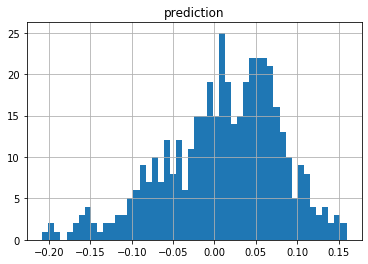

In [31]:
ingr_data.hist(bins=50)

In [32]:
ingr_data.nlargest(40,"prediction")

,ingr1,ingr2,prediction
1090,cheese,eel,0.159526
1078,cheese,hot_roll_mix,0.157575
1119,cheese,hop,0.149803
939,cheese,veggie_burger,0.149465
1056,cheese,kamaboko,0.146328
1081,cheese,matzoh,0.139569
1020,cheese,pierogi,0.139007
1040,cheese,lox,0.134520
1042,cheese,essential_oil,0.134329
1088,cheese,brown_sauce,0.131044


In [ ]:
with open()